수집된 데이터 기본 정보:
총 데이터 수: 84
그룹 수: 28


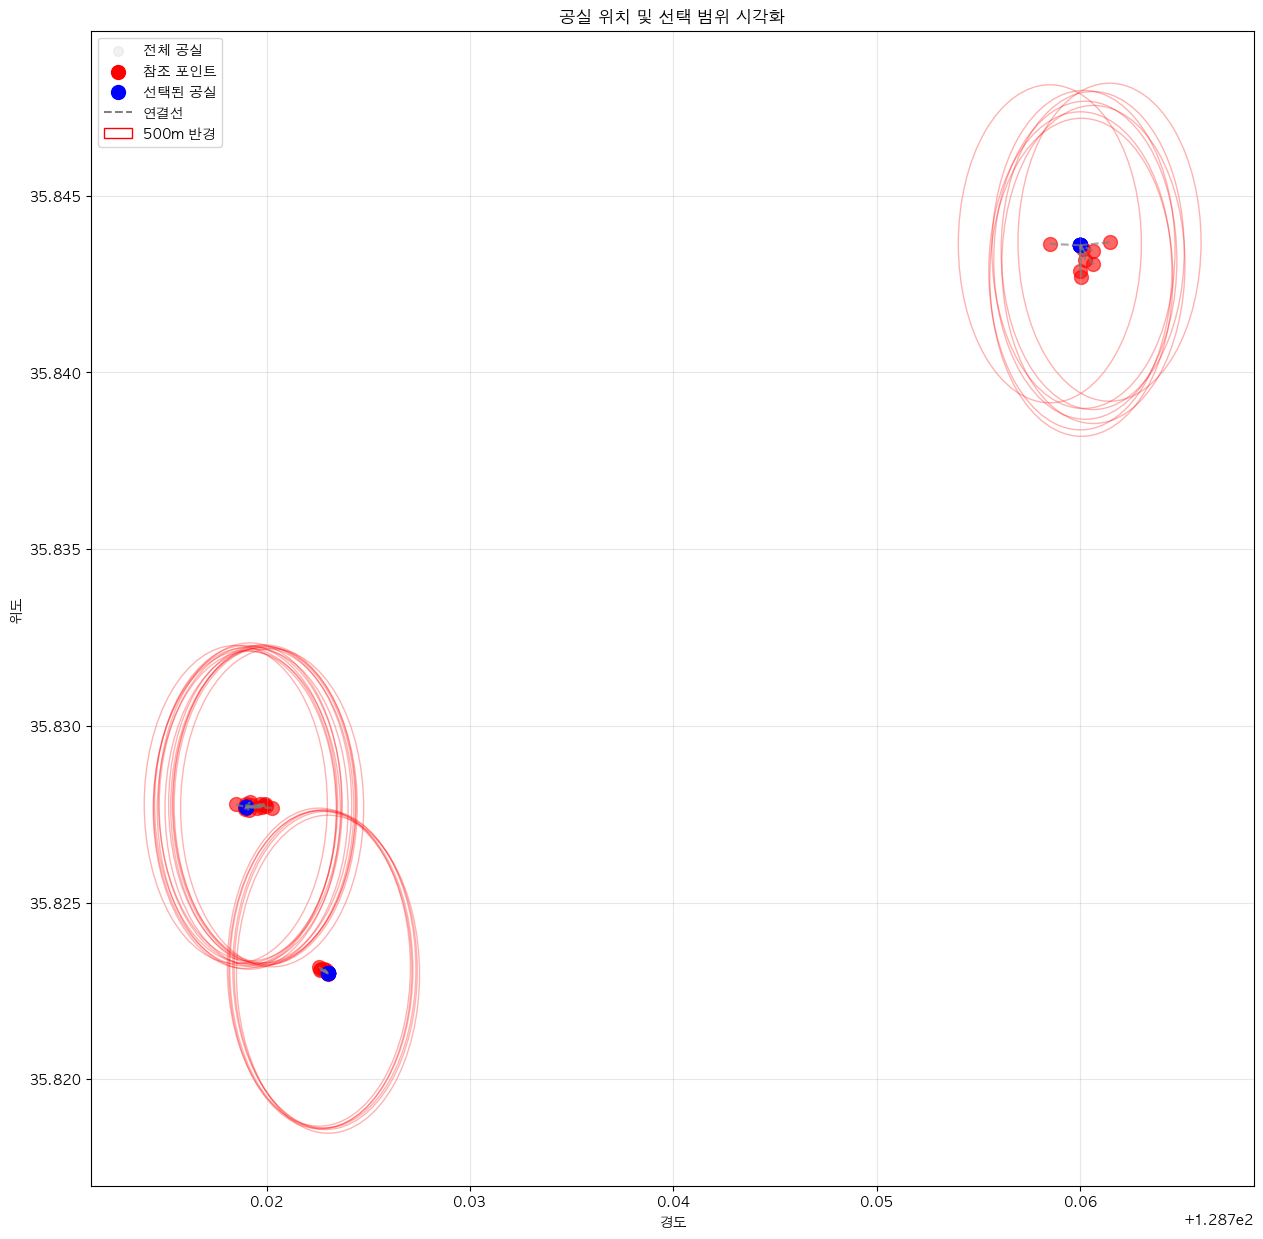

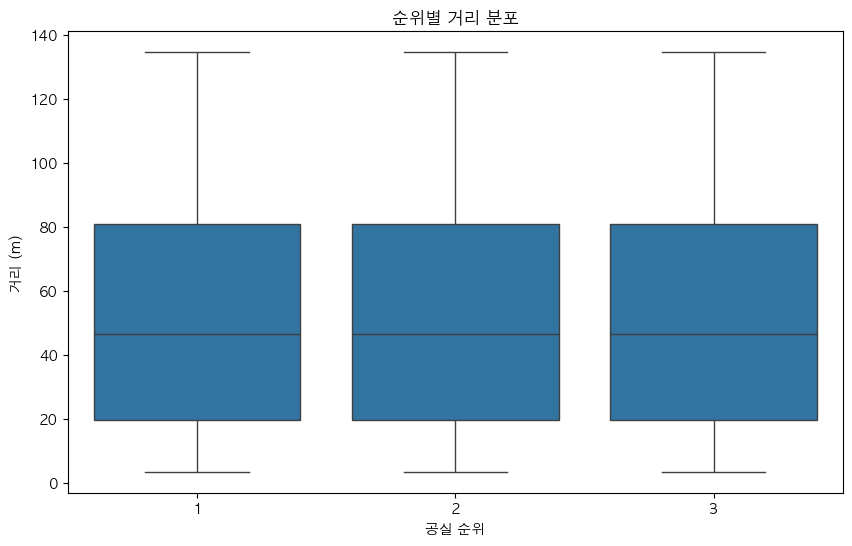

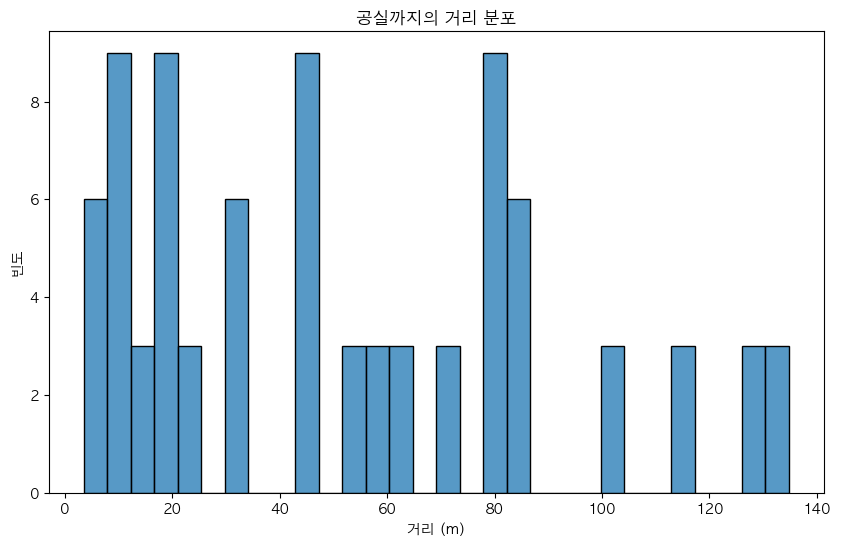


거리 통계 (미터 단위):
            count      mean        std       min        25%        50%  \
store_rank                                                               
1            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   
2            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   
3            28.0  52.59587  38.681643  3.549766  19.639882  46.462956   

                  75%         max  
store_rank                         
1           80.834836  134.725753  
2           80.834836  134.725753  
3           80.834836  134.725753  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시

# 데이터 로드
df = pd.read_csv('../data/output/collected_samples.csv')

# 1. 기본 통계 확인
print("수집된 데이터 기본 정보:")
print(f"총 데이터 수: {len(df)}")
print(f"그룹 수: {df['group_id'].nunique()}")

# 2. 위치 데이터 시각화
plt.figure(figsize=(15, 15))

# 전체 공실 위치 표시 (회색)
plt.scatter(df['store_lon'], df['store_lat'], 
           c='lightgray', alpha=0.3, s=50,
           label='전체 공실')

# 참조 포인트와 선택된 공실 시각화
for group in df['group_id'].unique():
    group_data = df[df['group_id'] == group]
    ref_point = group_data.iloc[0]
    
    # 500m 반경 원 그리기 (약 0.0045도)
    circle = Circle((ref_point['reference_lon'], ref_point['reference_lat']), 
                   0.0045, fill=False, alpha=0.3, color='red')
    plt.gca().add_patch(circle)
    
    # 참조 포인트 표시
    plt.scatter(ref_point['reference_lon'], ref_point['reference_lat'], 
               c='red', s=100, alpha=0.6)
    
    # 선택된 공실들 표시
    plt.scatter(group_data['store_lon'], group_data['store_lat'], 
               c='blue', s=100, alpha=0.6)
    
    # 참조 포인트와 공실 연결
    for _, store in group_data.iterrows():
        plt.plot([ref_point['reference_lon'], store['store_lon']], 
                [ref_point['reference_lat'], store['store_lat']], 
                'gray', alpha=0.3, linestyle='--')

plt.title('공실 위치 및 선택 범위 시각화')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True, alpha=0.3)

# 범례 추가
plt.scatter([], [], c='red', s=100, label='참조 포인트')
plt.scatter([], [], c='blue', s=100, label='선택된 공실')
plt.plot([], [], 'gray', linestyle='--', label='연결선')
circle = plt.Circle((0, 0), 1, fill=False, color='red', label='500m 반경')
plt.gca().add_artist(circle)
plt.legend()

plt.show()

# 3. 거리 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store_rank', y='distance')
plt.title('순위별 거리 분포')
plt.xlabel('공실 순위')
plt.ylabel('거리 (m)')
plt.show()

# 4. 거리 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='distance', bins=30)

plt.title('공실까지의 거리 분포')
plt.xlabel('거리 (m)')
plt.ylabel('빈도')
plt.show()

# 5. 기본 통계량
print("\n거리 통계 (미터 단위):")
print(df.groupby('store_rank')['distance'].describe())

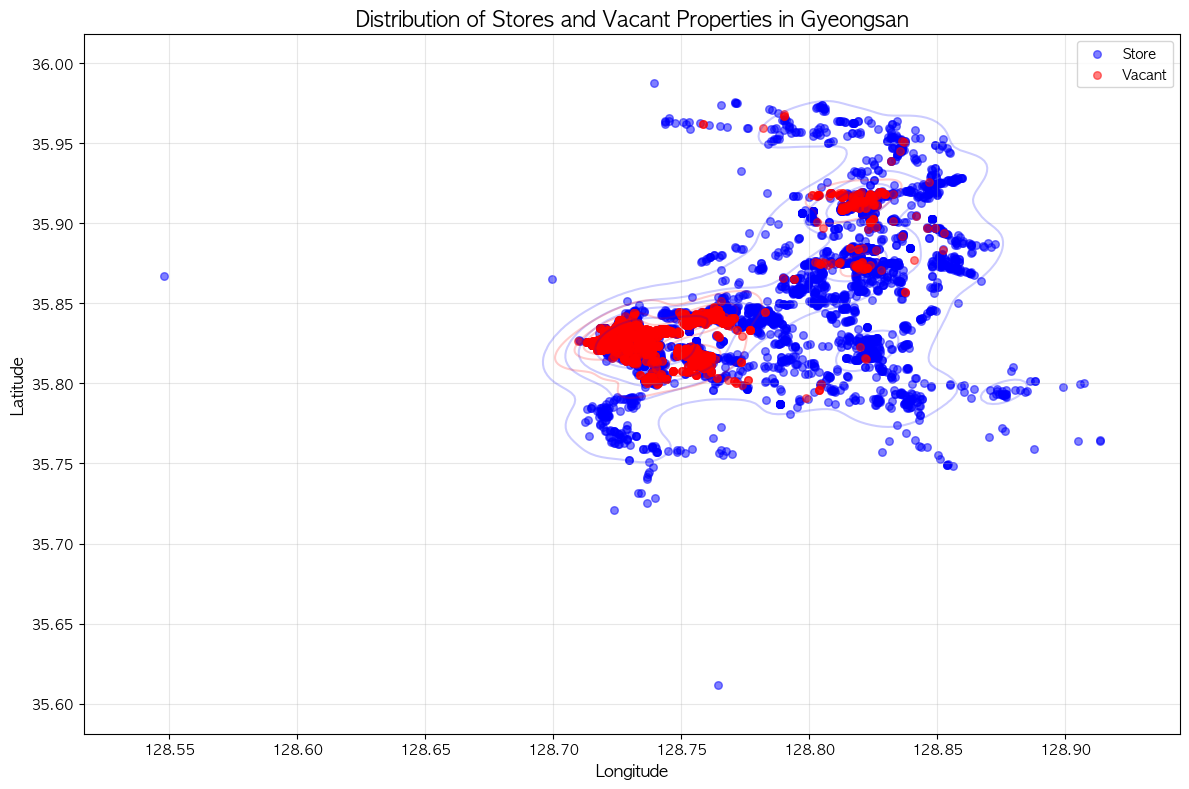

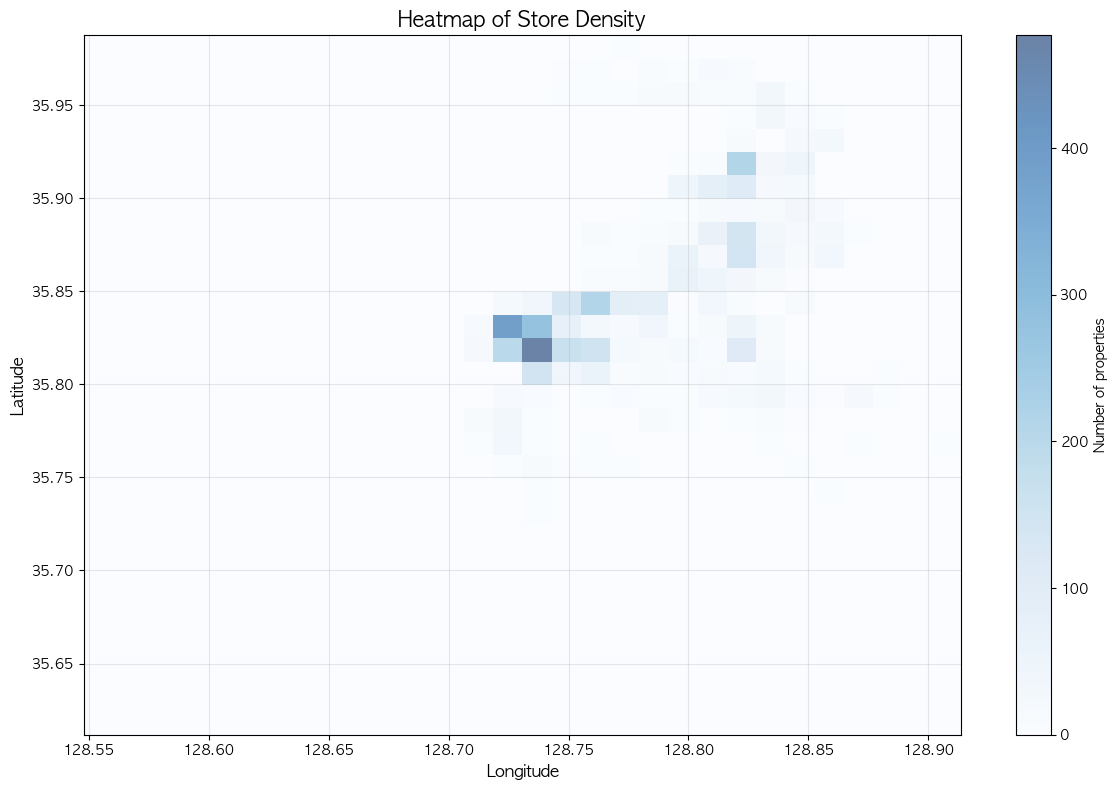

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
store_df = pd.read_csv('../data/Store_common.csv')
vacant_df = pd.read_csv('../data/Vacant.common.csv')

# 시각화
plt.figure(figsize=(12, 8))

# 상가 데이터 플롯 (파란색)
plt.scatter(store_df['경도'], store_df['위도'], 
           alpha=0.5, c='blue', label='Store', s=30)

# 공실 데이터 플롯 (빨간색)
plt.scatter(vacant_df['경도'], vacant_df['위도'], 
           alpha=0.5, c='red', label='Vacant', s=30)

# 그래프 꾸미기
plt.title('Distribution of Stores and Vacant Properties in Gyeongsan', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# 밀도가 높은 지역을 강조하기 위한 등고선 추가
sns.kdeplot(data=store_df, x='경도', y='위도', 
            levels=5, color='blue', alpha=0.2)
sns.kdeplot(data=vacant_df, x='경도', y='위도', 
            levels=5, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

# 추가적인 분석: 지역별 밀집도 히트맵
plt.figure(figsize=(12, 8))
plt.hist2d(store_df['경도'], store_df['위도'], 
           bins=30, cmap='Blues', alpha=0.6)
plt.colorbar(label='Number of properties')
plt.title('Heatmap of Store Density', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


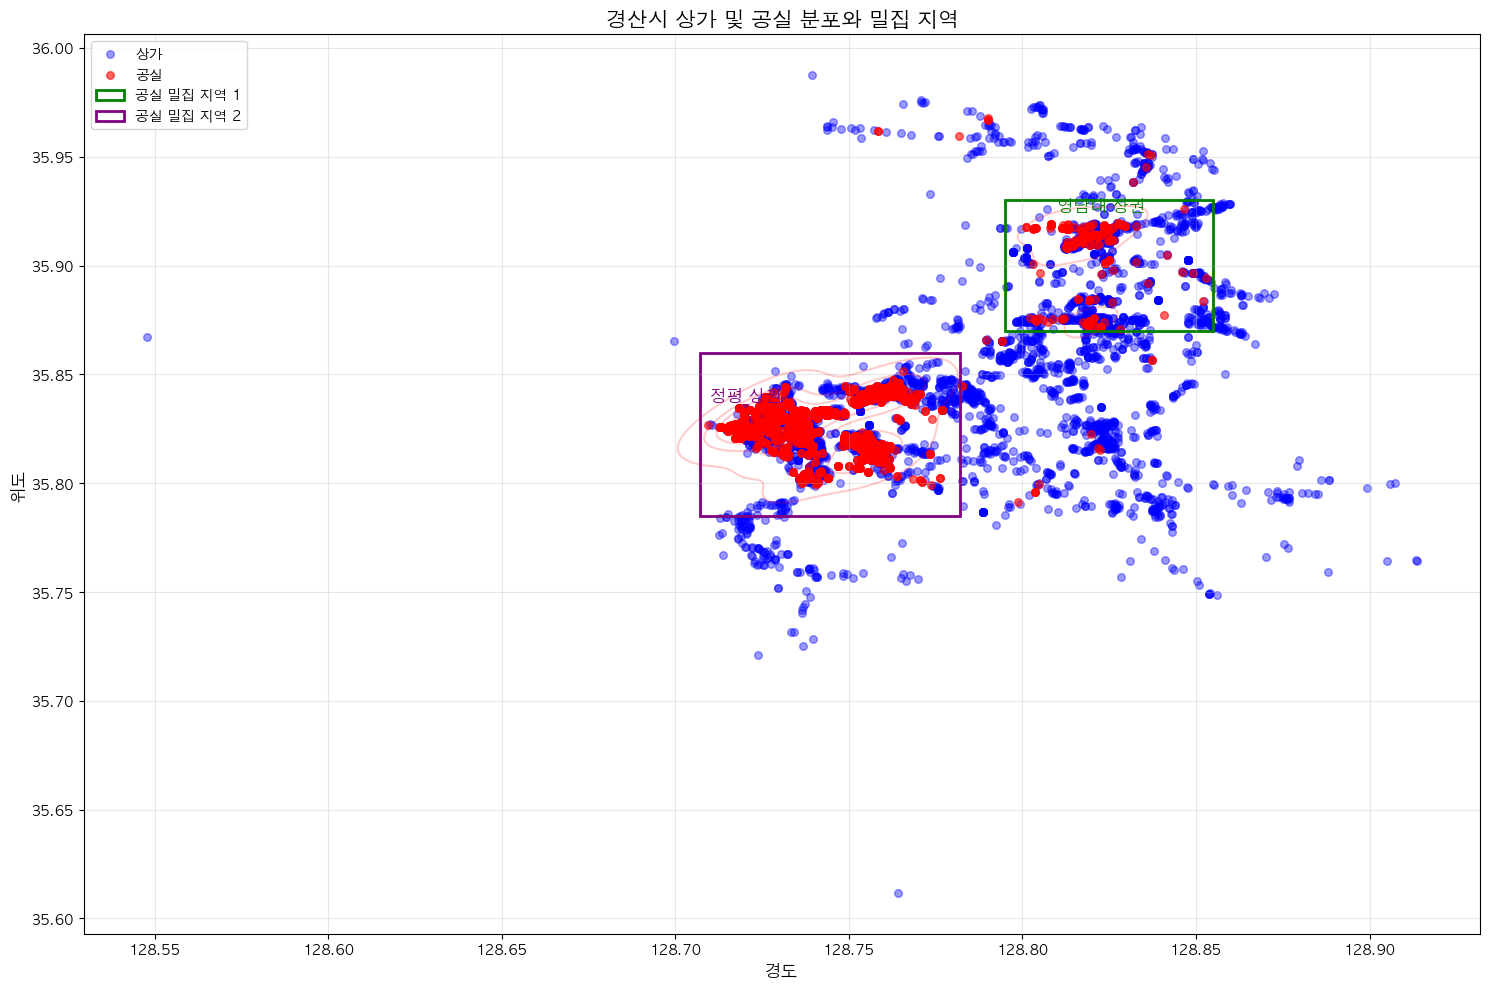


밀집 지역 통계:
영남대 상권 - 공실: 130개, 상가: 412개
정평 상권 - 공실: 539개, 상가: 261개


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# 데이터 로드
store_df = pd.read_csv('../data/Store_common.csv')
vacant_df = pd.read_csv('../data/Vacant.common.csv')

# 시각화
plt.figure(figsize=(15, 10))

# 상가 데이터 플롯 (파란색)
plt.scatter(store_df['경도'], store_df['위도'], 
           alpha=0.4, c='blue', label='상가', s=30)

# 공실 데이터 플롯 (빨간색)
plt.scatter(vacant_df['경도'], vacant_df['위도'], 
           alpha=0.6, c='red', label='공실', s=30)

# 밀집 지역 1: 영남대 근처 (좌표값은 실제 데이터에 맞게 조정 필요)
rect1 = Rectangle((128.795, 35.87), 0.06, 0.06,  # (x, y, width, height)
                 linewidth=2, edgecolor='green', facecolor='none',
                 label='공실 밀집 지역 1')
plt.gca().add_patch(rect1)
plt.text(128.81, 35.925, '영남대 상권', 
         fontsize=12, color='green')

# 밀집 지역 2: 정평 근처
rect2 = Rectangle((128.707, 35.785), 0.075, 0.075,
                 linewidth=2, edgecolor='purple', facecolor='none',
                 label='공실 밀집 지역 2')
plt.gca().add_patch(rect2)
plt.text(128.71, 35.838, '정평 상권', 
         fontsize=12, color='purple')

# 그래프 꾸미기
plt.title('경산시 상가 및 공실 분포와 밀집 지역', fontsize=15)
plt.xlabel('경도', fontsize=12)
plt.ylabel('위도', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# 밀도 등고선 추가
sns.kdeplot(data=vacant_df, x='경도', y='위도', 
            levels=5, color='red', alpha=0.2)

plt.tight_layout()
plt.show()

# 밀집 지역의 통계 출력
def count_points_in_rectangle(df, x_min, x_max, y_min, y_max):
    return len(df[(df['경도'] >= x_min) & (df['경도'] <= x_max) & 
                 (df['위도'] >= y_min) & (df['위도'] <= y_max)])

# 영남대 지역 통계
area1_vacant = count_points_in_rectangle(vacant_df, 128.81, 128.83, 35.90, 35.92)
area1_store = count_points_in_rectangle(store_df, 128.81, 128.83, 35.90, 35.92)

# 정평 지역 통계
area2_vacant = count_points_in_rectangle(vacant_df, 128.71, 128.725, 35.82, 35.835)
area2_store = count_points_in_rectangle(store_df, 128.71, 128.725, 35.82, 35.835)

print("\n밀집 지역 통계:")
print(f"영남대 상권 - 공실: {area1_vacant}개, 상가: {area1_store}개")
print(f"정평 상권 - 공실: {area2_vacant}개, 상가: {area2_store}개")

생성된 좌표 수: 1000
영남대상권: 300개
정평상권: 700개
파일 저장 완료: ../data/random_coordinates.csv


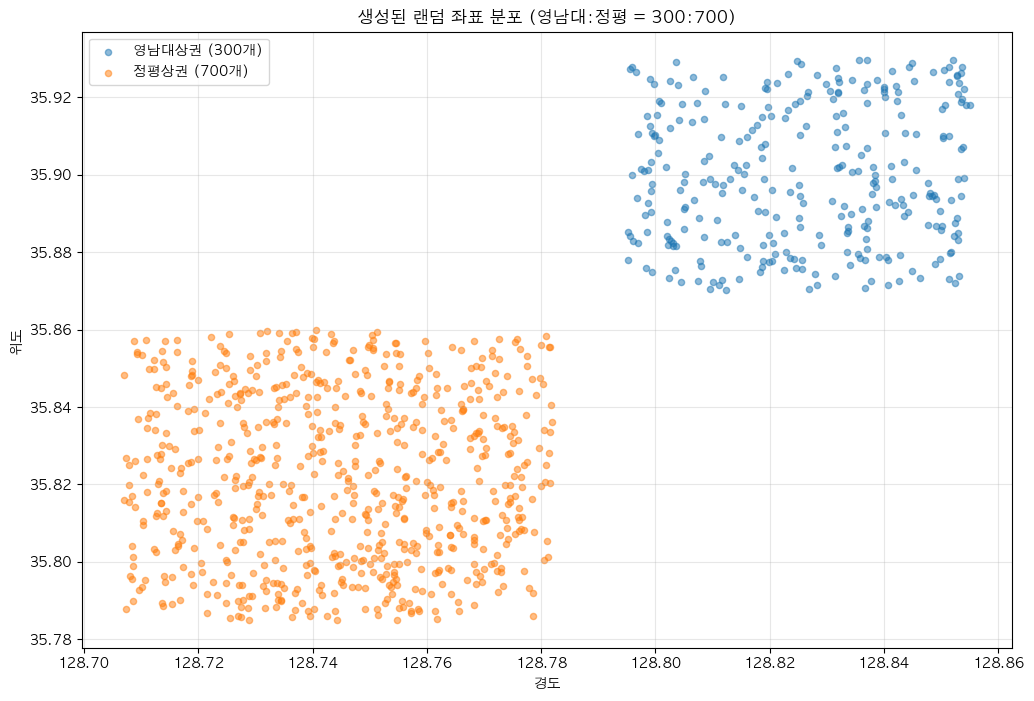

In [21]:
import numpy as np
import pandas as pd

def generate_random_coordinates(x_min, y_min, width, height, n_points):
    """지정된 사각형 영역 내에서 랜덤한 좌표 생성"""
    longs = np.random.uniform(x_min, x_min + width, n_points)
    lats = np.random.uniform(y_min, y_min + height, n_points)
    return list(zip(lats, longs))

# 영남대 상권 영역 (rect1) - 300개
area1_coords = generate_random_coordinates(
    x_min=128.795, 
    y_min=35.87,
    width=0.06,
    height=0.06,
    n_points=300
)

# 정평 상권 영역 (rect2) - 700개
area2_coords = generate_random_coordinates(
    x_min=128.707,
    y_min=35.785,
    width=0.075,
    height=0.075,
    n_points=700
)

# 데이터프레임 생성
df = pd.DataFrame(area1_coords + area2_coords, columns=['위도', '경도'])
df['지역'] = ['영남대상권'] * 300 + ['정평상권'] * 700

# CSV 파일로 저장
output_path = '../data/random_coordinates.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"생성된 좌표 수: {len(df)}")
print(f"영남대상권: {len(df[df['지역'] == '영남대상권'])}개")
print(f"정평상권: {len(df[df['지역'] == '정평상권'])}개")
print(f"파일 저장 완료: {output_path}")

# 생성된 좌표 시각화
plt.figure(figsize=(12, 8))
for area in ['영남대상권', '정평상권']:
    area_data = df[df['지역'] == area]
    plt.scatter(area_data['경도'], area_data['위도'], 
               alpha=0.5, label=f"{area} ({len(area_data)}개)", s=20)

plt.title('생성된 랜덤 좌표 분포 (영남대:정평 = 300:700)')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

생성된 좌표 수: 1000
영남대상권: 300개
정평상권: 700개
파일 저장 완료: ../data/random_coordinates.csv


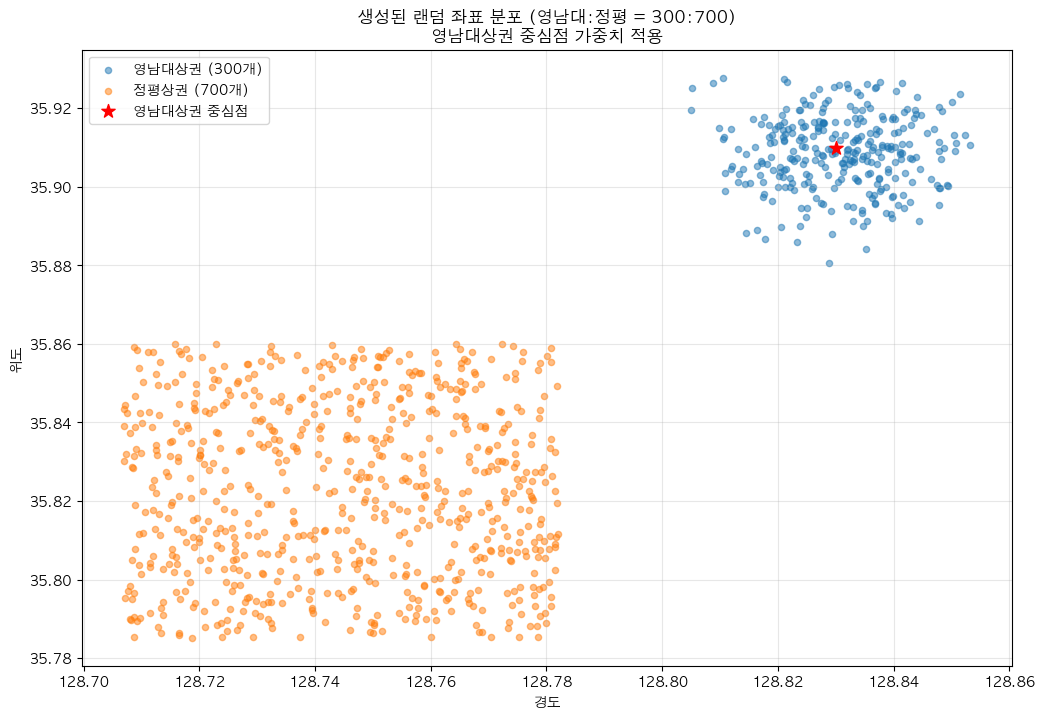

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_weighted_coordinates(center_x, center_y, sigma, n_points, x_min, x_max, y_min, y_max):
    """가우시안 분포를 사용하여 중심점 주변에 가중치를 둔 랜덤 좌표 생성"""
    while True:
        # 가우시안 분포로 좌표 생성
        longs = np.random.normal(center_x, sigma, n_points)
        lats = np.random.normal(center_y, sigma, n_points)
        
        # 지정된 범위 내의 좌표만 선택
        mask = (longs >= x_min) & (longs <= x_max) & (lats >= y_min) & (lats <= y_max)
        longs = longs[mask]
        lats = lats[mask]
        
        # 필요한 개수만큼 좌표가 생성되었는지 확인
        if len(longs) >= n_points:
            return list(zip(lats[:n_points], longs[:n_points]))

def generate_uniform_coordinates(x_min, y_min, width, height, n_points):
    """균일 분포로 랜덤 좌표 생성"""
    longs = np.random.uniform(x_min, x_min + width, n_points)
    lats = np.random.uniform(y_min, y_min + height, n_points)
    return list(zip(lats, longs))

# 영남대 상권 영역 (가중치 적용)
area1_coords = generate_weighted_coordinates(
    center_x=128.83,  # 중심점 경도
    center_y=35.91,   # 중심점 위도
    sigma=0.01,       # 분포의 표준편차 (조절 가능)
    n_points=300,     # 생성할 좌표 수
    x_min=128.795,    # 영역의 경계
    x_max=128.795 + 0.06,
    y_min=35.87,
    y_max=35.87 + 0.06
)

# 정평 상권 영역 (균일 분포)
area2_coords = generate_uniform_coordinates(
    x_min=128.707,
    y_min=35.785,
    width=0.075,
    height=0.075,
    n_points=700
)

# 데이터프레임 생성
df = pd.DataFrame(area1_coords + area2_coords, columns=['위도', '경도'])
df['지역'] = ['영남대상권'] * 300 + ['정평상권'] * 700

# CSV 파일로 저장
output_path = '../data/random_coordinates.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"생성된 좌표 수: {len(df)}")
print(f"영남대상권: {len(df[df['지역'] == '영남대상권'])}개")
print(f"정평상권: {len(df[df['지역'] == '정평상권'])}개")
print(f"파일 저장 완료: {output_path}")

# 생성된 좌표 시각화
plt.figure(figsize=(12, 8))
for area in ['영남대상권', '정평상권']:
    area_data = df[df['지역'] == area]
    plt.scatter(area_data['경도'], area_data['위도'], 
               alpha=0.5, label=f"{area} ({len(area_data)}개)", s=20)

# 영남대 상권 중심점 표시
plt.scatter(128.83, 35.91, color='red', s=100, marker='*', 
           label='영남대상권 중심점')

plt.title('생성된 랜덤 좌표 분포 (영남대:정평 = 300:700)\n영남대상권 중심점 가중치 적용')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

생성된 좌표 수: 1000
영남대상권: 300개
정평상권: 700개
파일 저장 완료: ../data/random_coordinates.csv


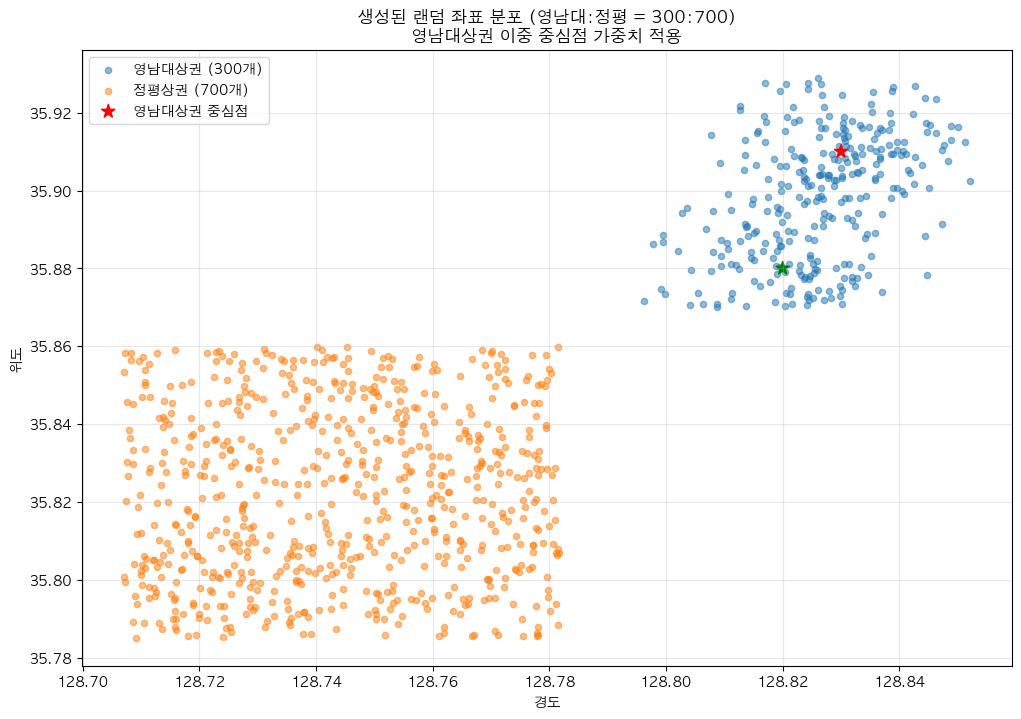

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_weighted_coordinates_dual_centers(
    center1_x, center1_y, center2_x, center2_y, 
    sigma, n_points, x_min, x_max, y_min, y_max):
    """두 개의 중심점을 가진 가우시안 분포로 랜덤 좌표 생성"""
    coords = []
    n_each = n_points // 2
    
    while len(coords) < n_points:
        # 첫 번째 중심점에서 좌표 생성
        longs1 = np.random.normal(center1_x, sigma, n_each)
        lats1 = np.random.normal(center1_y, sigma, n_each)
        
        # 두 번째 중심점에서 좌표 생성
        longs2 = np.random.normal(center2_x, sigma, n_each)
        lats2 = np.random.normal(center2_y, sigma, n_each)
        
        # 좌표 합치기
        longs = np.concatenate([longs1, longs2])
        lats = np.concatenate([lats1, lats2])
        
        # 범위 내의 좌표만 선택
        for lat, long in zip(lats, longs):
            if (x_min <= long <= x_max and y_min <= lat <= y_max):
                coords.append((lat, long))
                if len(coords) >= n_points:
                    break
    
    return coords[:n_points]

def generate_uniform_coordinates(x_min, y_min, width, height, n_points):
    """균일 분포로 랜덤 좌표 생성"""
    longs = np.random.uniform(x_min, x_min + width, n_points)
    lats = np.random.uniform(y_min, y_min + height, n_points)
    return list(zip(lats, longs))

# 영남대 상권 영역 (두 개의 중심점)
area1_coords = generate_weighted_coordinates_dual_centers(
    center1_x=128.83, center1_y=35.91,  # 첫 번째 중심점
    center2_x=128.82, center2_y=35.88,  # 두 번째 중심점
    sigma=0.01,       # 분포의 표준편차
    n_points=1000,     # 생성할 좌표 수
    x_min=128.795,    # 영역의 경계
    x_max=128.795 + 0.06,
    y_min=35.87,
    y_max=35.87 + 0.06
)

# 정평 상권 영역 (균일 분포)
area2_coords = generate_uniform_coordinates(
    x_min=128.707,
    y_min=35.785,
    width=0.075,
    height=0.075,
    n_points=2000
)

# 데이터프레임 생성
df = pd.DataFrame(area1_coords + area2_coords, columns=['위도', '경도'])
df['지역'] = ['영남대상권'] * 1000 + ['정평상권'] * 2000

# CSV 파일로 저장
output_path = '../data/random_coordinates.csv'
df.to_csv(output_path, index=False, encoding='utf-8')

print(f"생성된 좌표 수: {len(df)}")
print(f"영남대상권: {len(df[df['지역'] == '영남대상권'])}개")
print(f"정평상권: {len(df[df['지역'] == '정평상권'])}개")
print(f"파일 저장 완료: {output_path}")

# 생성된 좌표 시각화
plt.figure(figsize=(12, 8))
for area in ['영남대상권', '정평상권']:
    area_data = df[df['지역'] == area]
    plt.scatter(area_data['경도'], area_data['위도'], 
               alpha=0.5, label=f"{area} ({len(area_data)}개)", s=20)

# 영남대 상권 두 중심점 표시
plt.scatter([128.83, 128.82], [35.91, 35.88], 
           color=['red', 'green'], s=100, marker='*', 
           label='영남대상권 중심점')

plt.title('생성된 랜덤 좌표 분포 (영남대:정평 = 300:700)\n영남대상권 이중 중심점 가중치 적용')
plt.xlabel('경도')
plt.ylabel('위도')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
